In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (623).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (421).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (301).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (401).png
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (599).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (257).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (5).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (166).png
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (206).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (551).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (452).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (438).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (711).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (9).jpg
/kaggle/input/vehicle-classification/Vehicles/Ships/Ship (96).jpg


In [3]:
import shutil
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [4]:

main_dir = "/kaggle/input/vehicle-classification/Vehicles"
categories = ["Auto Rickshaws", "Bikes", "Cars", "Motorcycles", "Planes", "Ships", "Trains"]



In [5]:
split_dirs = ["train", "val", "test"]
base_split_dir = "/kaggle/working/vehicles_split"

for split_dir in split_dirs:
    for category in categories:
        os.makedirs(os.path.join(base_split_dir, split_dir, category), exist_ok=True)
        

In [6]:
for category in categories:
    category_path = os.path.join(main_dir, category)
    images = os.listdir(category_path)
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    def move_images(image_list, destination):
        for image in image_list:
            shutil.copy(os.path.join(category_path, image), os.path.join(base_split_dir, destination, category, image))

    move_images(train_images, "train")
    move_images(val_images, "val")
    move_images(test_images, "test")

In [7]:


train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(os.path.join(base_split_dir, "train"), target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical')
val_generator = val_test_datagen.flow_from_directory(os.path.join(base_split_dir, "val"), target_size=(150, 150),
                                                     batch_size=32, class_mode='categorical')
test_generator = val_test_datagen.flow_from_directory(os.path.join(base_split_dir, "test"), target_size=(150, 150),
                                                      batch_size=32, class_mode='categorical')



Found 3911 images belonging to 7 classes.
Found 837 images belonging to 7 classes.
Found 839 images belonging to 7 classes.


In [8]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6182 - loss: 1.1866

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 540s 4s/step - accuracy: 0.6191 - loss: 1.1836 - val_accuracy: 0.8889 - val_loss: 0.3023
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.8113 - loss: 0.5183 - val_accuracy: 0.8984 - val_loss: 0.2929
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 539s 4s/step - accuracy: 0.8363 - loss: 0.4714 - val_accuracy: 0.9008 - val_loss: 0.2729
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.8647 - loss: 0.3757 - val_accuracy: 0.9223 - val_loss: 0.2212
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.8766 - loss: 0.3682 - val_accuracy: 0.9176 - val_loss: 0.2515
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 538s 4s/step - accuracy: 0.8692 - loss: 0.3644 - val_accuracy: 0.9223 - val_loss: 0.2250
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 538s 4s/step - accuracy: 0.8825 - loss: 0.3419 - val_accuracy: 0.9104 - val_loss: 0.2627
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 519s 4s/step - accuracy: 0.8788 - loss: 0.3397 - val_accuracy: 0.917

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9265 - loss: 0.1909
Test accuracy: 92.85%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


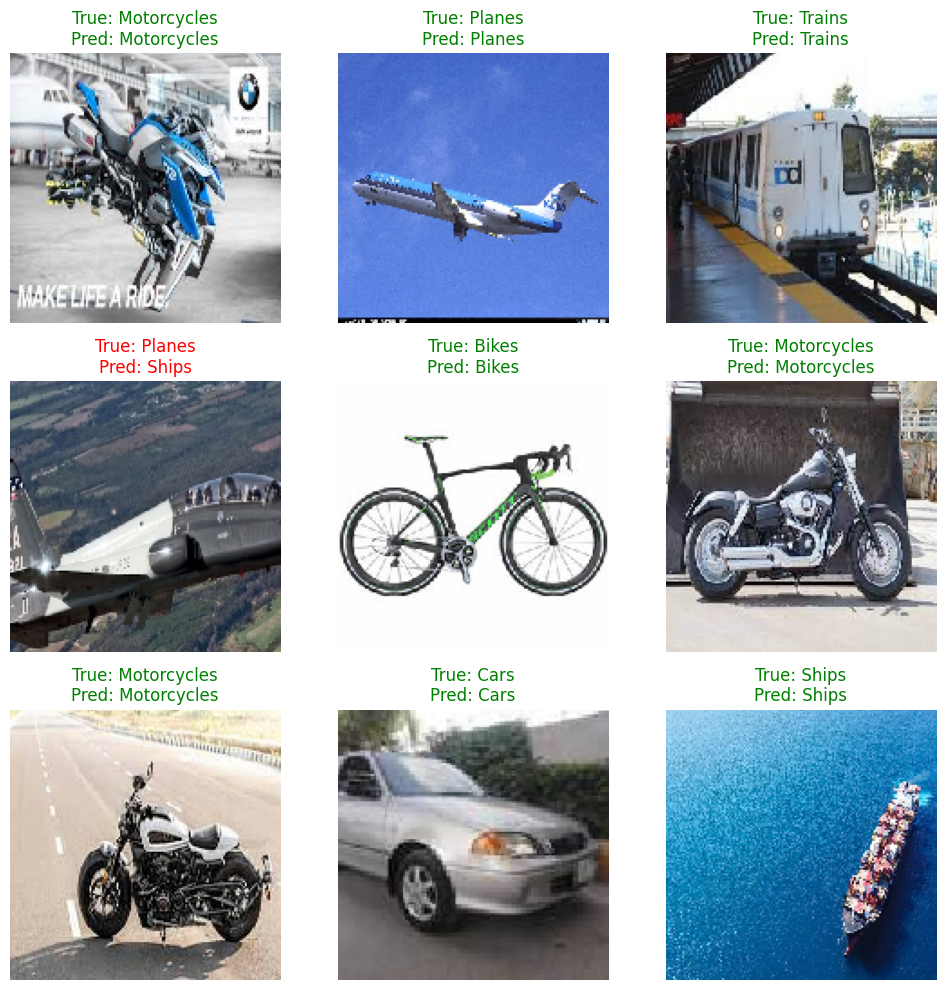

In [12]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


test_images, test_labels = next(test_generator)
indices = random.sample(range(len(test_images)), 9)

predictions = model.predict(test_images[indices])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels[indices], axis=1)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx])
    plt.axis('off')

    true_label = categories[true_labels[i]]
    predicted_label = categories[predicted_labels[i]]
    color = 'green' if true_label == predicted_label else 'red'

    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)

plt.tight_layout()
plt.show()